# Iris Dataset

Link of the dataset: [https://archive.ics.uci.edu/dataset/53/iris](https://archive.ics.uci.edu/dataset/53/iris)

- **Author:** BrenoAV
- **Last modified date:** 10-29-2023

# Load dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

iris = load_iris(as_frame=True)

## Data Exploration

In [2]:
iris.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

The data is balanced between three classes

## Univariate Plots

In [5]:
import matplotlib.pyplot as plt

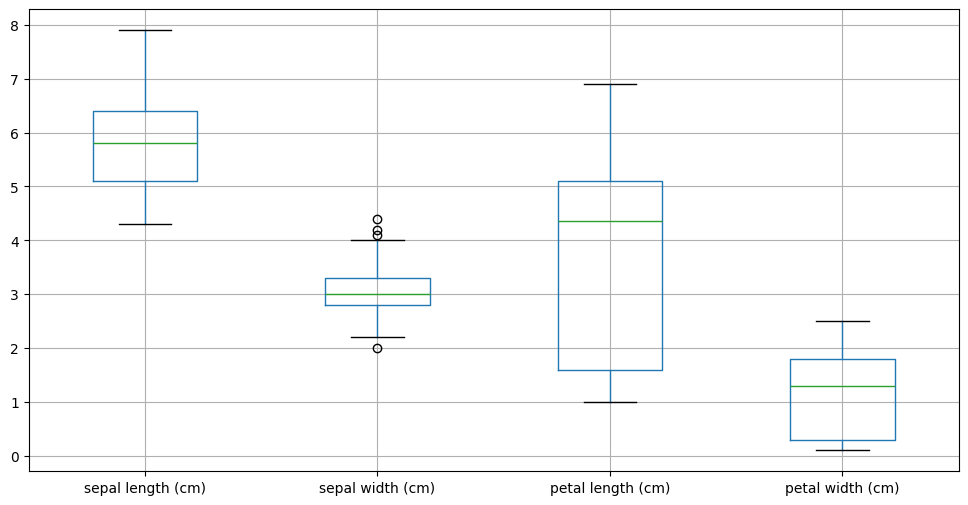

In [6]:
iris.data.boxplot(figsize=(12, 6))
plt.show()

The data doesn't have outliers and the boxplot shows us that the median is not located in the meaning of petal measures.

## Multivariate plot

In [7]:
colors = ["red", "green", "blue"]
target_names = iris.target_names
df_grouped = iris.frame.groupby(by="target")

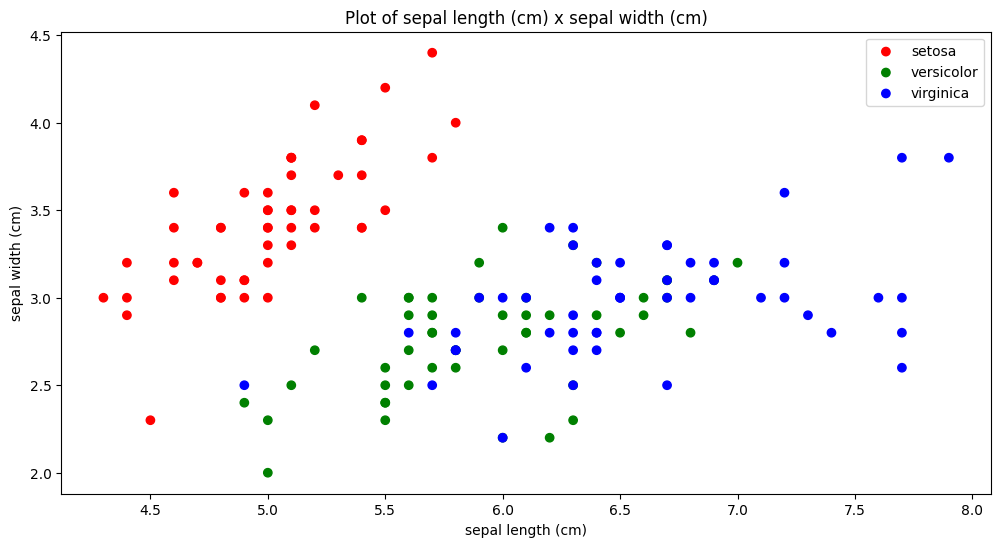

In [8]:
plt.figure(figsize=(12, 6))
for target, df in df_grouped:
    plt.scatter(df["sepal length (cm)"], 
                df["sepal width (cm)"], 
                color=[colors[i] for i in df.target], 
                label=target_names[target])
plt.title("Plot of sepal length (cm) x sepal width (cm)")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

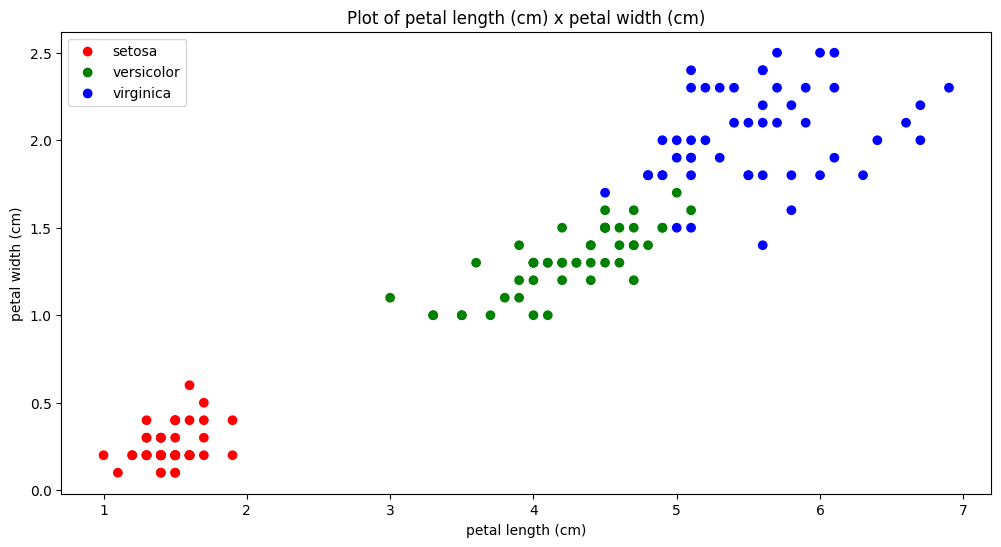

In [9]:
plt.figure(figsize=(12, 6))
for target, df in df_grouped:
    plt.scatter(df["petal length (cm)"], 
                df["petal width (cm)"], 
                color=[colors[i] for i in df.target], 
                label=target_names[target])
plt.title("Plot of petal length (cm) x petal width (cm)")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()

These plots show that the petal is more good to classifier the plant!

## Split dataset

In [10]:
X = iris.data[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123)

# Scikit-Learn

I won't use the grid search to find the best n_neighbors like the regression algorithm, but you can use the same approach there &rarr; Regression-Algorithms &rarr; knn &rarr; kNN-Abalone.ipynb

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test)

In [14]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
print(f"Accuracy: {acc:.4f}\nPrecision: {precision:.4f}\nRecal: {recall:.4f}")

Accuracy: 0.9737
Precision: 0.9762
Recal: 0.9744


# From scratch

In [15]:
# This is my implementation from scratch of the KNN Algorithm
# More implementations here: https://github.com/BrenoAV/ml-from-scratch
import sys
sys.path.append("/home/brenoav/GitHub/ml-from-scratch/")
from src.knn import KNNClassifier

knn_scratch = KNNClassifier(X_train.values, y_train.values)
y_pred = []
for x in X_test.values:
    y_pred.append(knn_scratch.predict(x, k=5))

In [16]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
print(f"Accuracy: {acc:.4f}\nPrecision: {precision:.4f}\nRecal: {recall:.4f}")

Accuracy: 0.9737
Precision: 0.9762
Recal: 0.9744
